In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


In [2]:
# precompute measures
ks = [100]
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = {}
measures_birds_leuven = {}
measures_birds_rosch = {}
for k in ks:
    measures_emotion_eng[k] = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)
    measures_birds_leuven[k] = nn_measure_over_words(words_leuven, pos, pos_data, data, t1, t2, k)
    measures_birds_rosch[k] = nn_measure_over_words(words_rosch, pos, pos_data, data, t1, t2, k)


In [3]:
# helper functions
# comparing semantic change in emotion words and bird names
from sklearn.neighbors import KernelDensity

def estimate_bounded(x, lb, ub, samples, h):
    transform = lambda x: np.log(x - lb) - np.log(ub - x)
    y = transform(x).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(y)
    ret = np.exp(kde.score_samples(transform(samples).reshape(-1, 1)))
    ret = ret * (1 / (samples - lb) + 1 / (ub - samples))
    return ret

def plot_kde_bounded(x, h, p, ax, label, color, scatter_y):
    samples = np.linspace(0.001, 1 - 0.001, 1000)
    density = estimate_bounded(np.array([y for y in x if y < 1.]), 0, 1, samples, h)
    ax.plot(np.concatenate([[0], samples, [1]]), np.concatenate([[0], density, [0]]), label=label, color=color)
    ax.fill_between(samples, density, step="pre", alpha=0.4, color=color)
    ax.set_xlabel('Degree of change', fontsize=30)
    ax.set_ylabel('Density', fontsize=30)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.scatter(x, [scatter_y] * len(p), color=color, marker='o', s=200*p**2)

def plot_kde(x, h, p, ax, label, color, scatter_y):
    ax = sns.kdeplot(x, ax=ax, shade=True, color=color, label=label, kernel='gau')
    ax.set_xlabel('Degree of change', fontsize=30)
    ax.set_ylabel('Density', fontsize=30)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.scatter(x, [scatter_y] * len(p), color=color, marker='o', s=200*p**2)
    
def standardize_proto(x):
    return (x - np.mean(x)) / np.std(x)
 
def normalize_proto(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
    

123 38 25


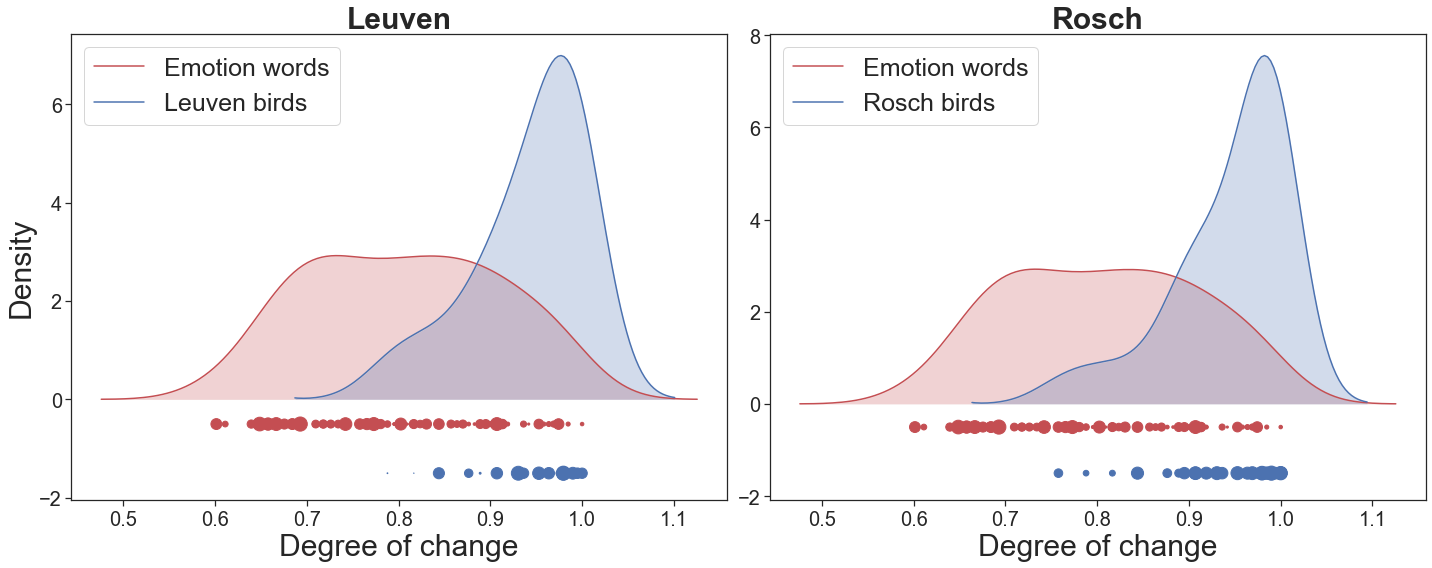

In [4]:
colours = ['r', 'b']
words = list(measures_emotion_eng[100].keys()) 
words2 = list(measures_birds_rosch[100].keys())
words3 = list(measures_birds_leuven[100].keys())
print(len(words), len(words2), len(words3))
x = np.array([measures_emotion_eng[100][w] for w in words])
x2 = np.array([measures_birds_rosch[100][w] for w in words2])
x3 = np.array([measures_birds_leuven[100][w] for w in words3])
p = normalize_proto(np.array([proto[w] for w in measures_emotion_eng[100]]))
p2 = normalize_proto(np.array([proto_rosch[w] for w in measures_birds_rosch[100]]))
p3 = normalize_proto(np.array([proto_leuven[w] for w in measures_birds_leuven[100]]))

h = 0.6
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 8))
plot_kde(x, h, p, axes[0], 'Emotion words', colours[0], -0.5)
plot_kde(x3, h, p3, axes[0], 'Leuven birds', colours[1], -1.5)
axes[0].set_title('Leuven', fontsize=30, weight='bold')
axes[0].legend(prop={'size': 25})
plot_kde(x, h, p, axes[1], 'Emotion words', colours[0], -0.5)
plot_kde(x2, h, p2, axes[1], 'Rosch birds', colours[1], -1.5)
axes[1].set_title('Rosch', fontsize=30, weight='bold')
axes[1].set_ylabel('')
axes[1].legend(prop={'size': 25})

plt.tight_layout()
img_format = 'svg'
plt.savefig('images/emotion_vs_birds.'+img_format, format=img_format, bbox_inches='tight')


